<a href="https://colab.research.google.com/github/JackyJoa/movie-review-project/blob/main/IMDB_main_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import pandas as pd
import numpy as np

import os #library in managing directories
import re, string #library in removing special characters

#for text pre-processing
import nltk #natural language tool kit
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

#for visualization
!pip install wordcloud
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Load the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving imdb_data_extended.csv to imdb_data_extended.csv


In [ ]:
imdb_data = pd.read_csv('imdb_data_extended.csv')
print(imdb_data.head())
print(imdb_data.tail())

      id                                               text label  rating
0   4715  For a movie that gets no respect there sure ar...   pos       9
1  12390  Bizarre horror movie filled with famous faces ...   pos       8
2   8329  A solid, if unremarkable film. Matthau, as Ein...   pos       7
3   9063  It's a strange feeling to sit alone in a theat...   pos       8
4   3092  You probably all already know this by now, but...   pos      10
          id                                               text label  rating
49995  11513  With actors like Depardieu and Richard it is r...   neg       1
49996   5409  If you like to get a couple of fleeting glimps...   neg       1
49997  11187  When something can be anything you want it to ...   neg       1
49998   9359  I had heard good things about "States of Grace...   neg       3
49999  11556  Well, this movie actually did have one redeemi...   neg       1


In [ ]:
print(imdb_data.dtypes)
print("Data shape: ", imdb_data.shape)

id         int64
text      object
label     object
rating     int64
dtype: object
Data shape:  (50000, 4)


In [ ]:
imdb_data['text'][4000]

"I'm a fan of Crash and Blade Runner and this movie explores some of those highway death and 80s film noir themes that I like to see, so I enjoyed it.<br /><br />In general though, the essential stupidity of the film noir protagonist is not pulled off well by the female lead and her hero is nearly a neanderthal, hence the kitch warning."

## Text Pre-processing

In [ ]:
#text tokenizing
imdb_data['processed'] = imdb_data['text'].apply(lambda x: nltk.word_tokenize(x))
print(imdb_data)

          id                                               text label  rating  \
0       4715  For a movie that gets no respect there sure ar...   pos       9   
1      12390  Bizarre horror movie filled with famous faces ...   pos       8   
2       8329  A solid, if unremarkable film. Matthau, as Ein...   pos       7   
3       9063  It's a strange feeling to sit alone in a theat...   pos       8   
4       3092  You probably all already know this by now, but...   pos      10   
...      ...                                                ...   ...     ...   
49995  11513  With actors like Depardieu and Richard it is r...   neg       1   
49996   5409  If you like to get a couple of fleeting glimps...   neg       1   
49997  11187  When something can be anything you want it to ...   neg       1   
49998   9359  I had heard good things about "States of Grace...   neg       3   
49999  11556  Well, this movie actually did have one redeemi...   neg       1   

                           

In [ ]:
#stop word, white space, special character removal, contraction expansion, lowercase transformation

stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might", 'br']
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words = set(stop_words)

def remove_special_char(text):
    clean_text = re.sub(r'[^a-zA-Z\s]','', text)
    return clean_text

def remove_stopwords(text):
    clean_data = []
    for i in text.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

def expand_contractions(text):
    contractions_dict = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "would've": "would have",
    "should've": "should have",
    "hasn't": "has not",
    "haven't": "have not",
    "wasn't": "was not",
    "weren't": "were not",
    "we're": "we are",
    "didn't": "did not",
    "don't": "do not" }

    #Regular expression pattern to find contractions
    contractions_pattern = re.compile(r'\b(' + '|'.join(contractions_dict.keys()) + r')\b')

    def replace(match):
        return contractions_dict[match.group(0)]

    #Use regular expression to find and replace contractions
    expanded_text = contractions_pattern.sub(replace, text)

    return expanded_text


def data_cleaning(text):
    text = expand_contractions(text)
    text = remove_special_char(text)
    text = remove_stopwords(text)
    return text


imdb_data['processed'] = imdb_data['processed'].apply(lambda x: ' '.join(x))
imdb_data['processed'] = imdb_data['processed'].apply(lambda x: data_cleaning(x))
print(imdb_data.head(), imdb_data.tail())


      id                                               text label  rating  \
0   4715  For a movie that gets no respect there sure ar...   pos       9   
1  12390  Bizarre horror movie filled with famous faces ...   pos       8   
2   8329  A solid, if unremarkable film. Matthau, as Ein...   pos       7   
3   9063  It's a strange feeling to sit alone in a theat...   pos       8   
4   3092  You probably all already know this by now, but...   pos      10   

                                           processed  
0  movie gets respect sure lot memorable quotes l...  
1  bizarre horror movie filled famous faces stole...  
2  solid unremarkable film matthau einstein wonde...  
3  strange feeling sit alone theater occupied par...  
4  probably already know additional episodes neve...             id                                               text label  rating  \
49995  11513  With actors like Depardieu and Richard it is r...   neg       1   
49996   5409  If you like to get a couple of 

## EDA

<Axes: xlabel='label', ylabel='Count'>

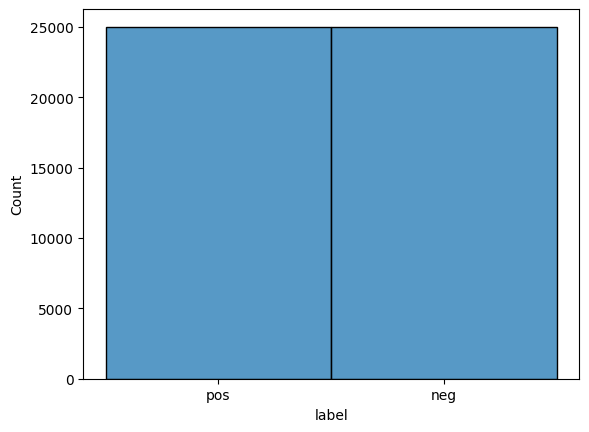

In [ ]:
sns.histplot(x = imdb_data['label'], binwidth= 5)

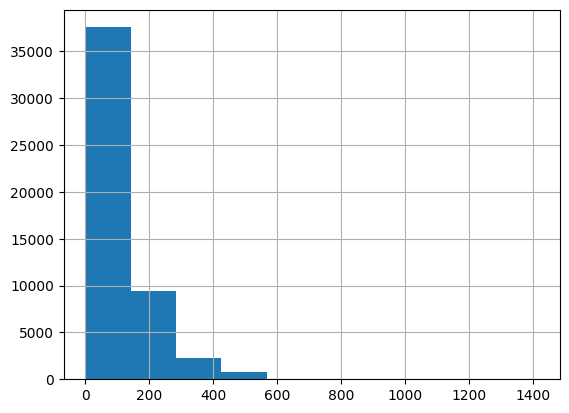

In [ ]:
#average number of words in each text
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

plot_word_number_histogram(imdb_data['processed'])

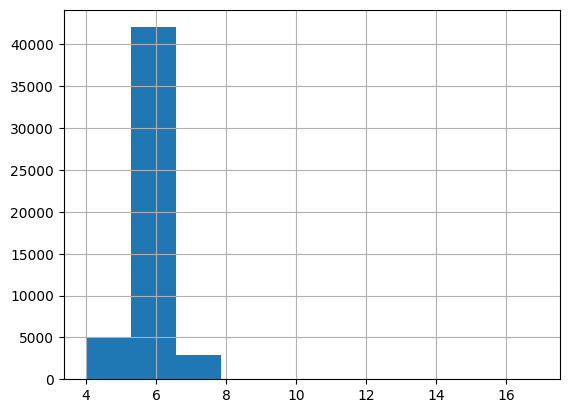

In [ ]:
#average word length per text
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

plot_word_length_histogram(imdb_data['processed'])

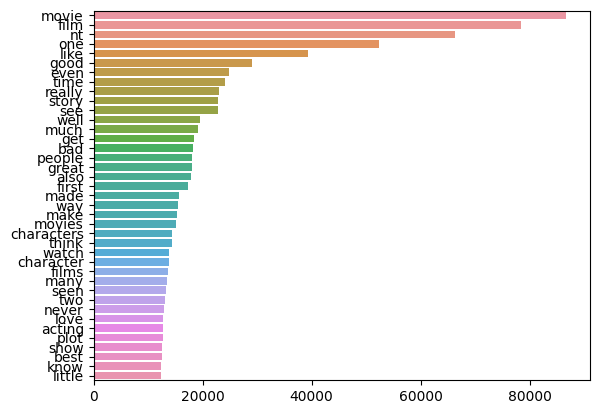

In [ ]:
from collections import  Counter

#which words occur most frequently
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)


plot_top_non_stopwords_barchart(imdb_data['processed'])

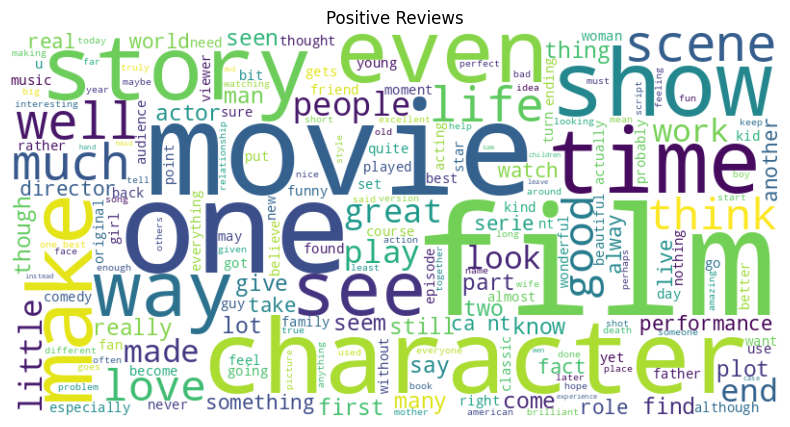

In [ ]:
clean_text = imdb_data['processed']
text_data = ' '.join(map(str, clean_text[imdb_data['label'] == 'pos']))

#Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

#Plot WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')  # Turn off axis labels
plt.show()


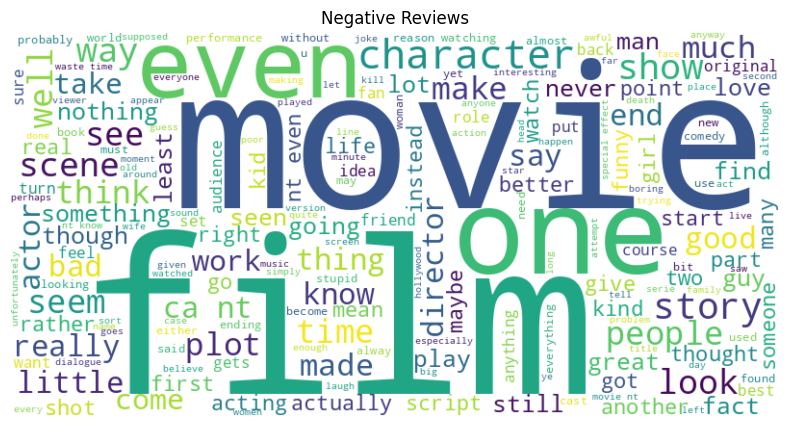

In [ ]:
clean_text = imdb_data['processed']
text_data = ' '.join(map(str, clean_text[imdb_data['label'] == 'neg']))

#Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

#Plot WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')  # Turn off axis labels
plt.show()

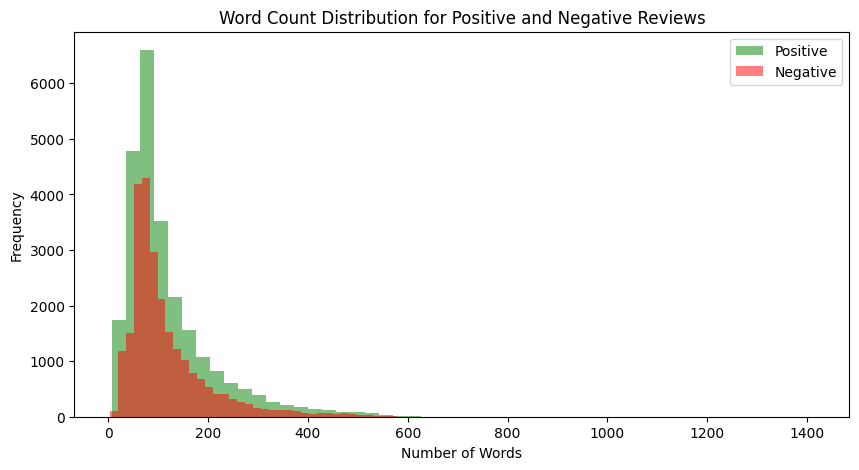

In [ ]:
#Filter DataFrame based on labels
positive_data = imdb_data[imdb_data['label'] == 'pos']
negative_data = imdb_data[imdb_data['label'] == 'neg']

#Extract the 'processed' text data
positive_text = positive_data['processed']
negative_text = negative_data['processed']

#Tokenize the text to count words
pos_word_counts = [len(text.split()) for text in positive_text]
neg_word_counts = [len(text.split()) for text in negative_text]

#Create histogram
plt.figure(figsize=(10, 5))
plt.hist(pos_word_counts, bins=50, alpha=0.5, label='Positive', color='green')
plt.hist(neg_word_counts, bins=50, alpha=0.5, label='Negative', color='red')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Word Count Distribution for Positive and Negative Reviews')
plt.legend()
plt.show()
